### Task-1 Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [3]:
data=pd.read_csv("D:\\Machine learning\\DS1_C9_S5_Practice_Diabetes_Data.csv")
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
data.describe()



,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


b

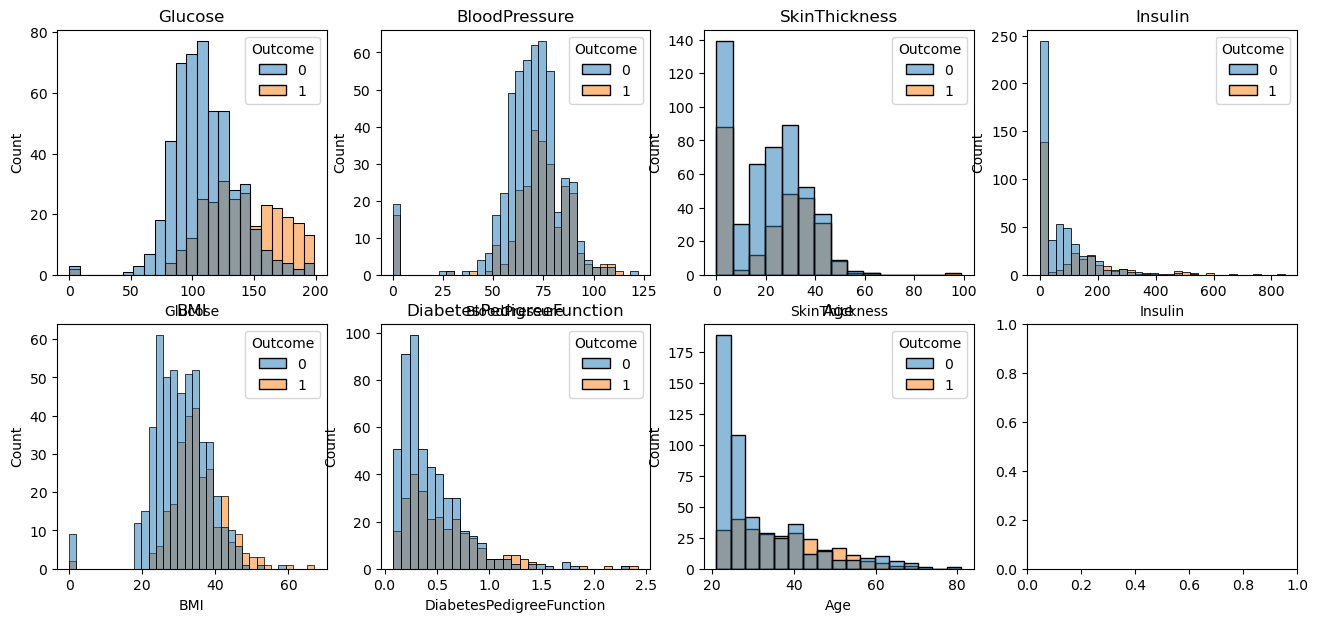

In [6]:
fig,ax=plt.subplots(2,4,figsize=(16,7))
ax=ax.flatten()
for i,col in enumerate(data.columns[:7]):
    sns.histplot(x=col,hue="Outcome",data=data,ax=ax[i])
    ax[i].set_title(col)
plt.show()
    

As per all columns patient have diabetic or not

c

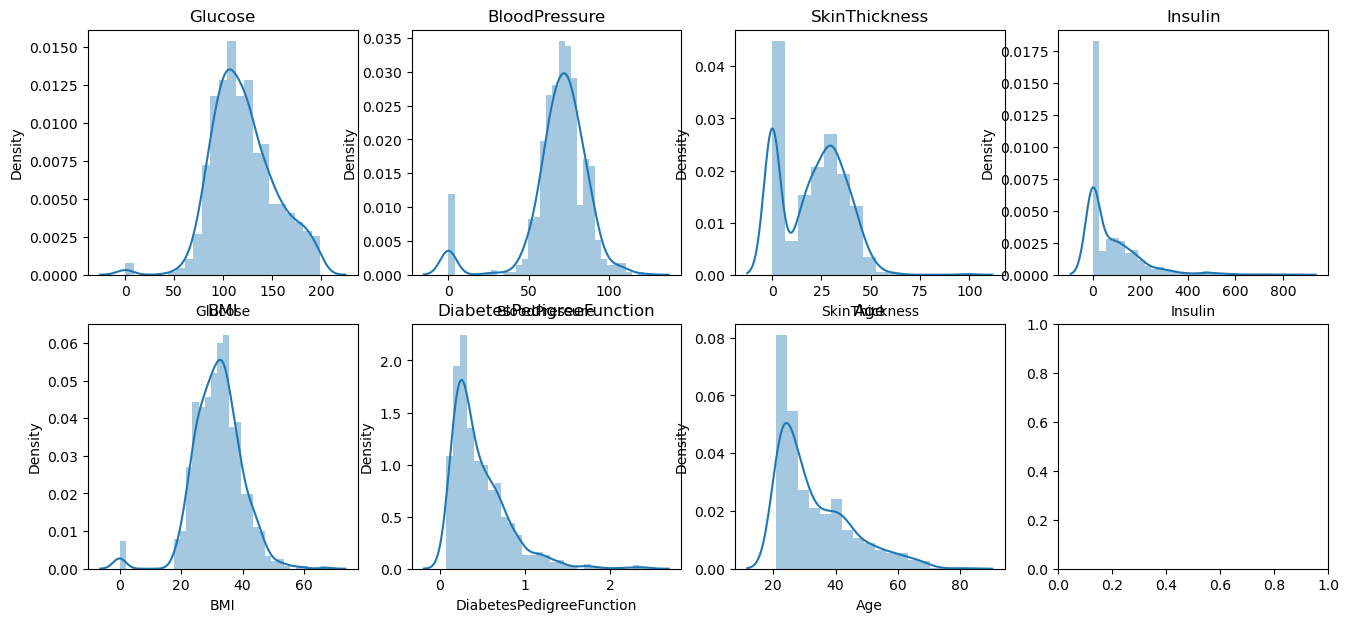

In [7]:
fig,ax=plt.subplots(2,4,figsize=(16,7))
ax=ax.flatten()
for i,col in enumerate(data.columns[:7]):
    sns.distplot(data[col],ax=ax[i])
    ax[i].set_title(col)
plt.show()

Most of the column are normally distributed

### Task-2

### Data Preparation

In [10]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]

In [11]:
scaler=StandardScaler()

In [12]:
si=scaler.fit_transform(x)

In [13]:
si=pd.DataFrame(si,columns=x.columns)

In [15]:
si

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...
763,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [41]:
# random under sampling
from imblearn.under_sampling import RandomUnderSampler

In [44]:
ru=RandomUnderSampler()

In [45]:
ru_x,ru_y=ru.fit_resample(si,y)

In [46]:
ru_y.value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

In [47]:
x_train,x_test,y_train,y_test=train_test_split(ru_x,ru_y,test_size=0.2,random_state=42)

### Task-3 Model Building

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
error_rate=[]
for i in range(1,16):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    print(i,model.score(x_train,y_train)*100,model.score(x_test,y_test)*100)
    y_predic=model.predict(x_test)
    error_rate.append(np.mean(y_predic!=y_test))
    

1 100.0 75.0
2 83.41121495327103 72.22222222222221
3 82.2429906542056 77.77777777777779
4 78.73831775700934 74.07407407407408
5 79.67289719626169 75.0
6 77.80373831775701 75.92592592592592
7 78.50467289719626 75.0
8 77.80373831775701 74.07407407407408
9 76.86915887850468 76.85185185185185
10 76.16822429906543 74.07407407407408
11 75.70093457943925 77.77777777777779
12 76.16822429906543 80.55555555555556
13 75.46728971962617 80.55555555555556
14 75.70093457943925 81.48148148148148
15 76.86915887850468 81.48148148148148


In [50]:
print(error_rate)

[0.25, 0.2777777777777778, 0.2222222222222222, 0.25925925925925924, 0.25, 0.24074074074074073, 0.25, 0.25925925925925924, 0.23148148148148148, 0.25925925925925924, 0.2222222222222222, 0.19444444444444445, 0.19444444444444445, 0.18518518518518517, 0.18518518518518517]


In [51]:
K=9

### Build Model

In [52]:
model1=KNeighborsClassifier(n_neighbors=9)

In [53]:
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

### Task-4 Model Evaluate

In [54]:
y_pre=model1.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [56]:
accuracy=accuracy_score(y_test,y_pre)
accuracy

0.7685185185185185

In [57]:
confusion_mat=confusion_matrix(y_test,y_pre)
confusion_mat

array([[41, 18],
       [ 7, 42]], dtype=int64)

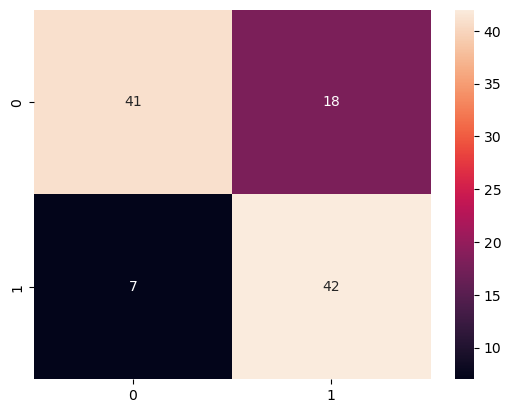

In [58]:
sns.heatmap(confusion_mat,annot=True)
plt.show()

In [59]:
recall=recall_score(y_test,y_pre)
recall

0.8571428571428571

In [60]:
precision=precision_score(y_test,y_pre)
precision

0.7

In [61]:
f1=f1_score(y_test,y_pre)
f1

0.7706422018348624

In [72]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc_score=roc_auc_score(y_test, model1.predict_proba(x_test)[:,1])
roc_score

0.8429609131788308

<Figure size 1000x800 with 0 Axes>

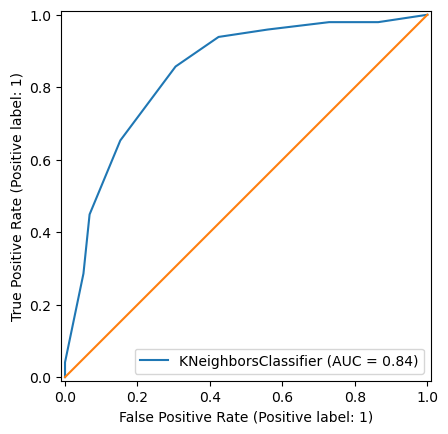

In [73]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(10,8))
RocCurveDisplay.from_estimator(model1,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

### Interpretation:

 High Recall (0.8571) means your model is very good at catching actual diabetic patients. This is critical in healthcare scenarios where missing a true positive (i.e., a diabetic case) can lead to serious consequences.

Precision (0.70) is slightly lower, meaning some false positives exist (predicting diabetes when the person doesn’t have it). This is a trade-off made to improve recall, which is acceptable in this context — better to catch more diabetic cases even if a few are wrong.

F1-score (0.77) shows a good overall balance — neither precision nor recall is drastically low.

ROC-AUC (0.843) confirms that your model performs very well at distinguishing between positive and negative classes across all thresholds.



well-balanced, with:

Strong recall (great for health risk detection),

Reasonable precision,

High AUC and accuracy.